# **Proyek Akhir : Klasifikasi Gambar**
### Nama : Thariq Iskandar Zulkarnain M P
### No. Pendaftaran : 0182180151-57
### Email : thariqiskandar9@gmail.com
### No. Handphone : 6281332409623
### Tema Pelatihan : FGA Machine Learning (IBM)

In [1]:
# import library yang diperlukan
import zipfile
import os
from sklearn.model_selection import train_test_split
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-04 10:54:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.89MB/s    in 1m 57s  

2021-07-04 10:56:39 (2.62 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakkukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# membuat variabel untuk menampung path direktori data train dan validation
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [5]:
# membuat variabel untuk menampung path direktori data rock, paper, dan scissors
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
# memecah direktori rock, paper, dan scissors menjadi data train dan data validation dengan perbandingan 60:40
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [7]:
# membuat variabel untuk menampung path direktori data rock, paper, scissors di setiap direktori data train dan validation
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat directori baru di dalam directori train dan val
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [8]:
# copy data train dan data val ke directory baru
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [9]:
# membuat sebuah objek ImageDataGenerator untuk data training dan data testing
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [10]:
# mempersiapkan data latih yang akan dipelajari oleh model menggunakan objek image data generator sebelumnya
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
# membuat arsitektur CNN
model = tf.keras.models.Sequential([
    # Konvolusi pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvolusi kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi keempat
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [12]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
# latih model dengan model.fit
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 49s - loss: 1.7044 - accuracy: 0.3575 - val_loss: 1.0411 - val_accuracy: 0.5063
Epoch 2/20
25/25 - 47s - loss: 1.0293 - accuracy: 0.5512 - val_loss: 0.7002 - val_accuracy: 0.7188
Epoch 3/20
25/25 - 47s - loss: 0.6231 - accuracy: 0.7462 - val_loss: 0.7927 - val_accuracy: 0.5938
Epoch 4/20
25/25 - 47s - loss: 0.4490 - accuracy: 0.8200 - val_loss: 0.6894 - val_accuracy: 0.7375
Epoch 5/20
25/25 - 47s - loss: 0.3518 - accuracy: 0.8775 - val_loss: 0.2939 - val_accuracy: 0.8875
Epoch 6/20
25/25 - 47s - loss: 0.2510 - accuracy: 0.9162 - val_loss: 0.3223 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 47s - loss: 0.2371 - accuracy: 0.9250 - val_loss: 0.2332 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 47s - loss: 0.2108 - accuracy: 0.9212 - val_loss: 0.2699 - val_accuracy: 0.9187
Epoch 9/20
25/25 - 47s - loss: 0.1617 - accuracy: 0.9450 - val_loss: 0.2385 - val_accuracy: 0.9062
Epoch 10/20
25/25 - 47s - loss: 0.1887 - accuracy: 0.9300 - val_loss: 0.1918 - val_accuracy: 0.9563
Epoch 11/

Saving 1MOm36DHK0R8OfIC.png to 1MOm36DHK0R8OfIC (1).png
1MOm36DHK0R8OfIC.png
rock


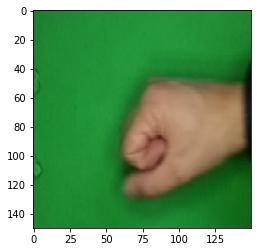

In [18]:
# kode untuk upload berkas agar dapat melihat hasil prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  else:
    print('scissors')